# Verificar que tenemos lo necesario para correr la inferencia

In [ ]:
from IPython import display
display.clear_output()

import supervision as sv
import ultralytics
import cv2
ultralytics.checks()


In [2]:
import os

# obtener el directorio actual
cwd = os.getcwd()

# foto que vamos a procesar
image_path = os.path.join(cwd, "..", "assets", "dog.jpeg")

# ubicacion del modelo base de yolo
model_path = os.path.join(cwd, "..", "weights", "yolo", "yolov8n.pt")

# ubicacion de salida
output_path = os.path.join(cwd, "..", "output")

In [ ]:
# cargar modelo
model = ultralytics.YOLO(model_path)

# inferencia y obtener predicciones
results = model(image_path)

# como solo tenemos una imagen, solo tomamos el primer resultado de la lista
first_image_results = results[0]

# anotador que nos permite aplicar las predicciones a la imagen para visualizarlas
annotator = sv.BoxAnnotator()

# convertir las predicciones a un objeto de supervision que servira para visualizarlas
detections = sv.Detections.from_ultralytics(first_image_results)

# agregar etiquetas para facilitar saber que se esta detectando
labels = [
    # imprimimos la clase en texto y la confianza que el modelo tiene en su prediccion
    f"{model.model.names[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections
]

image = cv2.imread(image_path)

# aplicar las predicciones a la imagen
annotated_image = annotator.annotate(scene=image, detections=detections, labels=labels)

# ubicacion de la imagen procesada
annotated_image_path = os.path.join(output_path, "dog-annotated.jpeg")

# guardar la imagen
cv2.imwrite(annotated_image_path, annotated_image)

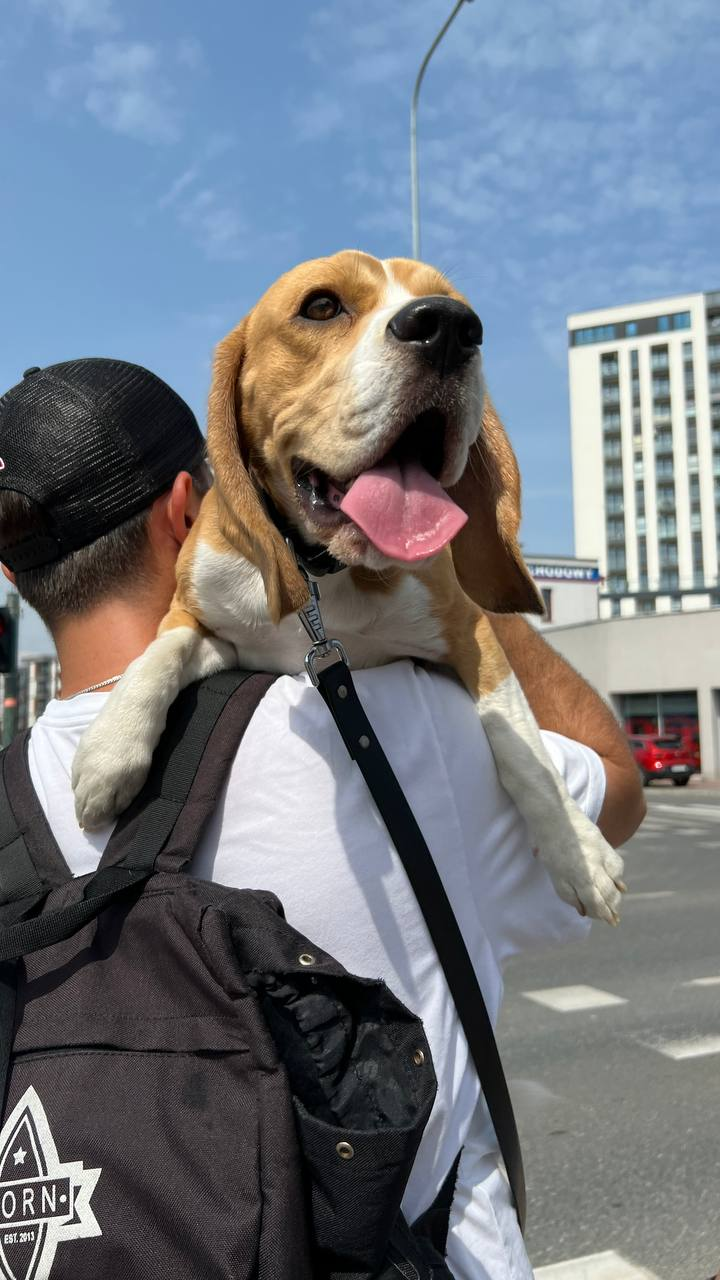

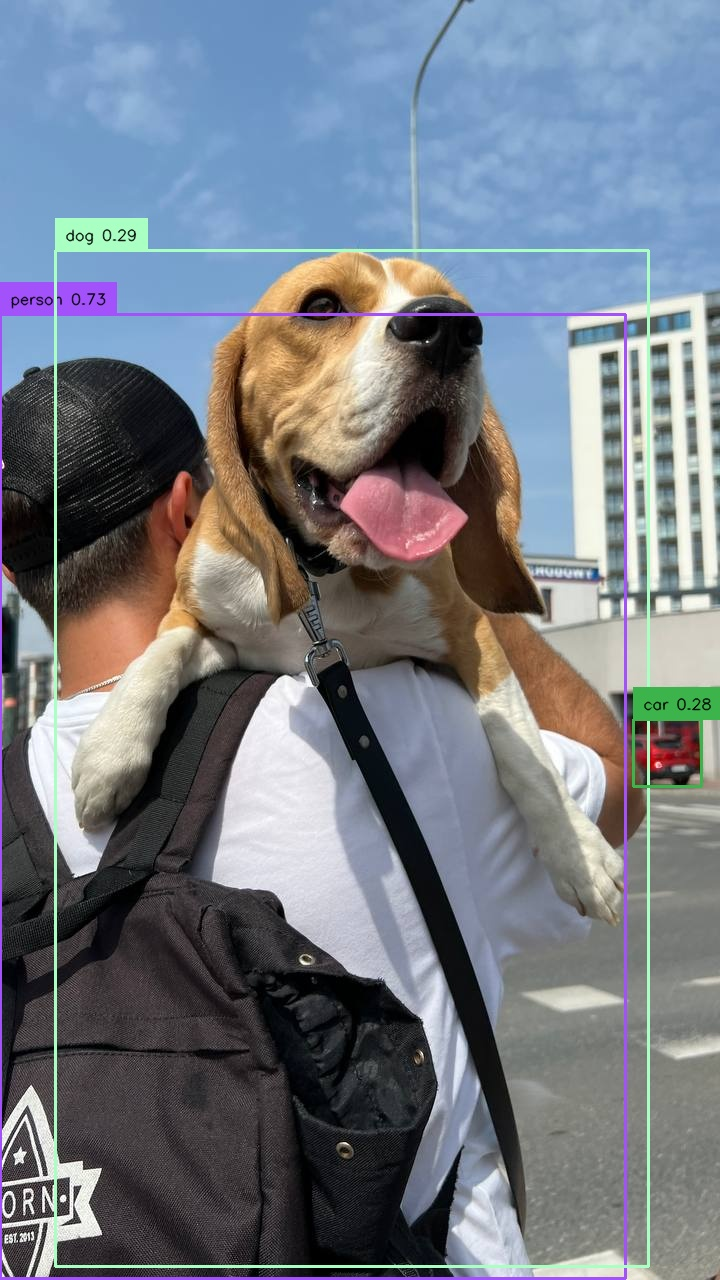

In [19]:
# imagen original
display.display(display.Image(image_path, width=300))

# mostrar imagen
display.display(display.Image(annotated_image_path, width=300))